##### Análise Geral - Dataset sobre Doença Cardíaca

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.dataset_info as datainfo
%matplotlib inline

##### Importação e Informações Iniciais

In [61]:
df = pd.read_csv("data/heart.csv")
df_num = pd.read_csv("data/dataset_codificado.csv")

In [62]:
df = df[df['Cholesterol'] != 0]

In [63]:
datainfo.informacao_dataset(df)

Primeiras linhas do dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Informações das colunas do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtyp

##### Correlações

In [64]:
corr_matrix = df_num.corr()
corr_matrix

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.040917,0.259865,0.058758,0.241338,-0.382112,0.245908,0.286006,0.298617,0.186737,-0.229820,-0.022271,0.050671,0.179061,-0.238592,0.109853,0.148987,0.202548,-0.272296
Sex,0.040917,1.000000,0.034363,-0.107045,0.096075,-0.157002,0.192579,0.125743,0.292779,0.176468,-0.138835,-0.080302,0.013732,-0.029859,-0.002763,0.037574,0.073531,0.102288,-0.136713
RestingBP,0.259865,0.034363,1.000000,0.095939,0.173765,-0.125774,0.161035,0.198575,0.173242,0.079102,-0.076092,-0.054299,0.065069,0.023214,-0.086085,0.086690,0.096915,0.081746,-0.127077
Cholesterol,0.058758,-0.107045,0.095939,1.000000,0.054012,-0.019856,0.086768,0.058488,0.103866,0.093470,-0.015945,-0.068441,-0.050253,0.079589,-0.046950,-0.028806,-0.010734,0.103996,-0.099063
FastingBS,0.241338,0.096075,0.173765,0.054012,1.000000,-0.102710,0.109995,0.055568,0.160594,0.050270,-0.093325,0.005850,0.049295,0.071935,-0.165081,0.135072,0.089243,0.105542,-0.147309
MaxHR,-0.382112,-0.157002,-0.125774,-0.019856,-0.102710,1.000000,-0.396289,-0.259533,-0.377212,-0.371491,0.243329,0.152321,0.091131,0.095477,0.039154,-0.159973,-0.077855,-0.346152,0.382786
ExerciseAngina,0.245908,0.192579,0.161035,0.086768,0.109995,-0.396289,1.000000,0.465491,0.551834,0.483025,-0.317049,-0.197576,-0.118155,-0.011100,-0.090978,0.132127,0.135442,0.440354,-0.503960
Oldpeak,0.286006,0.125743,0.198575,0.058488,0.055568,-0.259533,0.465491,1.000000,0.495696,0.346352,-0.303200,-0.135819,0.042978,0.096050,-0.130778,0.062598,0.390171,0.370642,-0.553175
HeartDisease,0.298617,0.292779,0.173242,0.103866,0.160594,-0.377212,0.551834,0.495696,1.000000,0.522982,-0.375634,-0.222146,-0.053765,0.069599,-0.133255,0.095921,0.132193,0.591554,-0.653759
ChestPainType_ASY,0.186737,0.176468,0.079102,0.093470,0.050270,-0.371491,0.483025,0.346352,0.522982,1.000000,-0.530697,-0.536862,-0.239224,0.054987,-0.107715,0.078984,0.111273,0.345895,-0.398138


In [65]:
plt.style.use('dark_background')

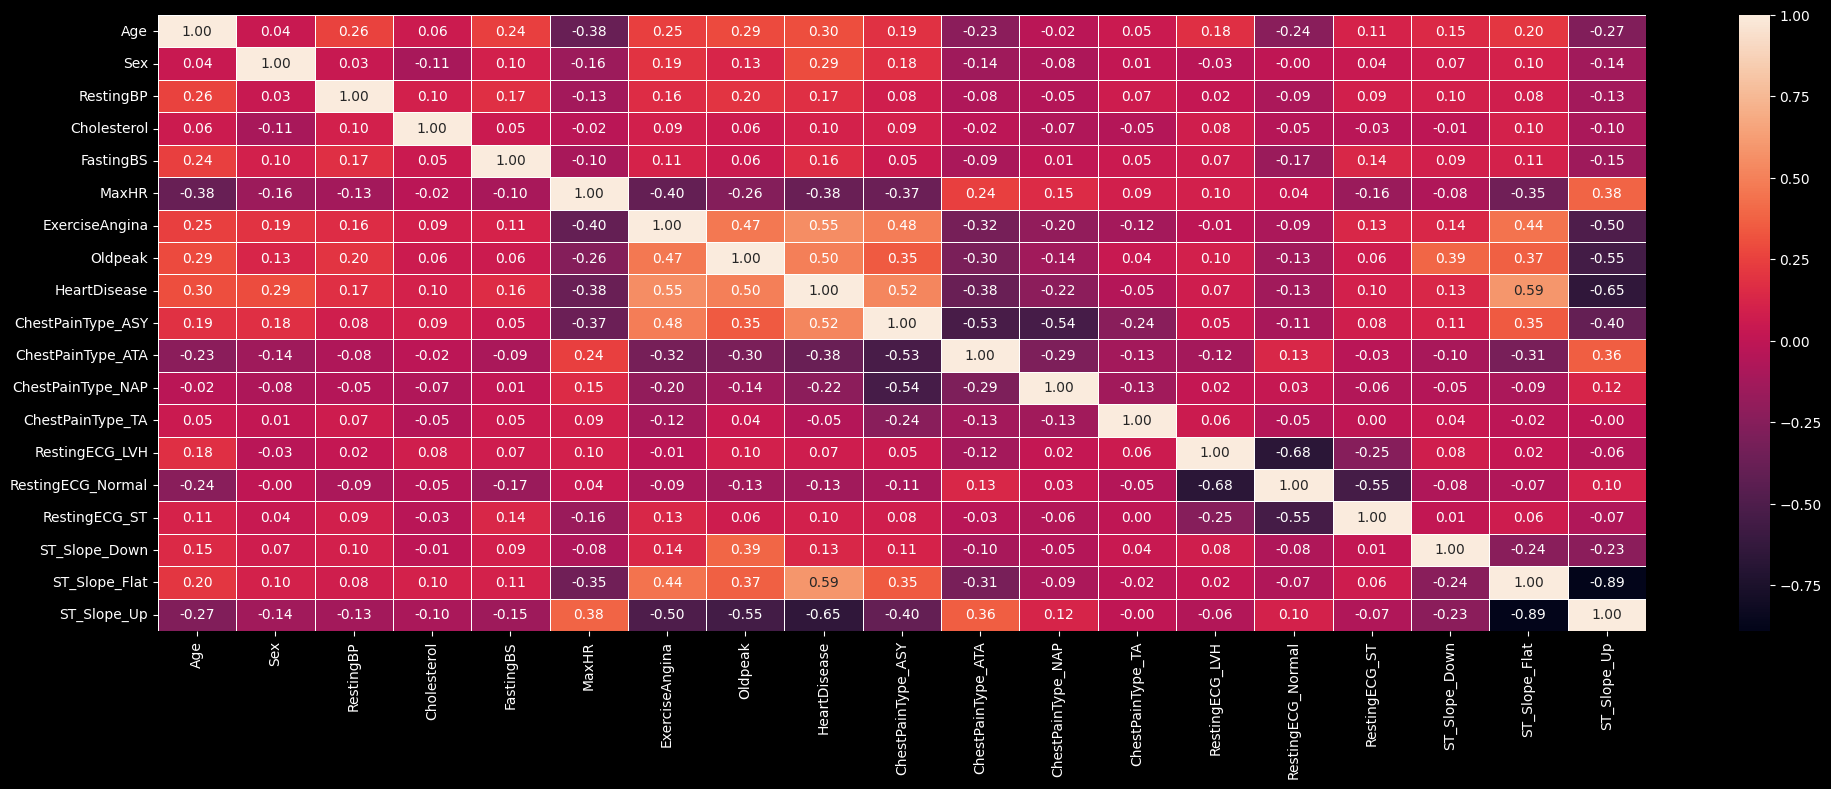

In [66]:
plt.figure(figsize=(24, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.2f')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right')
plt.show()

In [67]:
corr = df_num.corrwith(df_num['HeartDisease']).sort_values(ascending=False).to_frame()

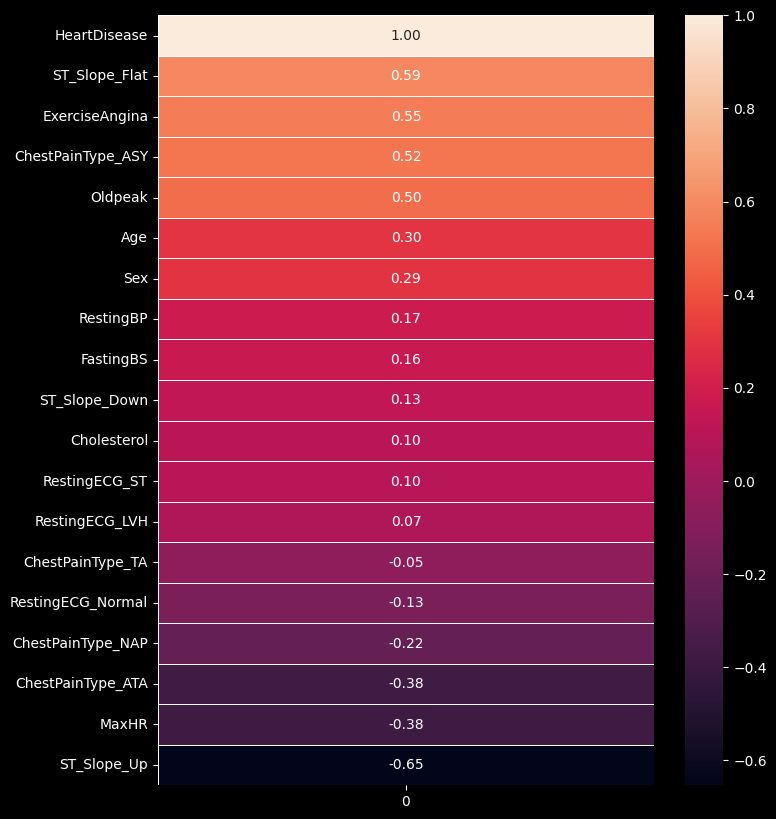

In [68]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right')
plt.show()

##### Análise Univariada

In [69]:
col_obj = [col for col in df.columns if df[col].dtype == "object"]
col_num = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]
col_num.remove('HeartDisease')
col_num.remove('FastingBS')
col_obj.append('FastingBS')

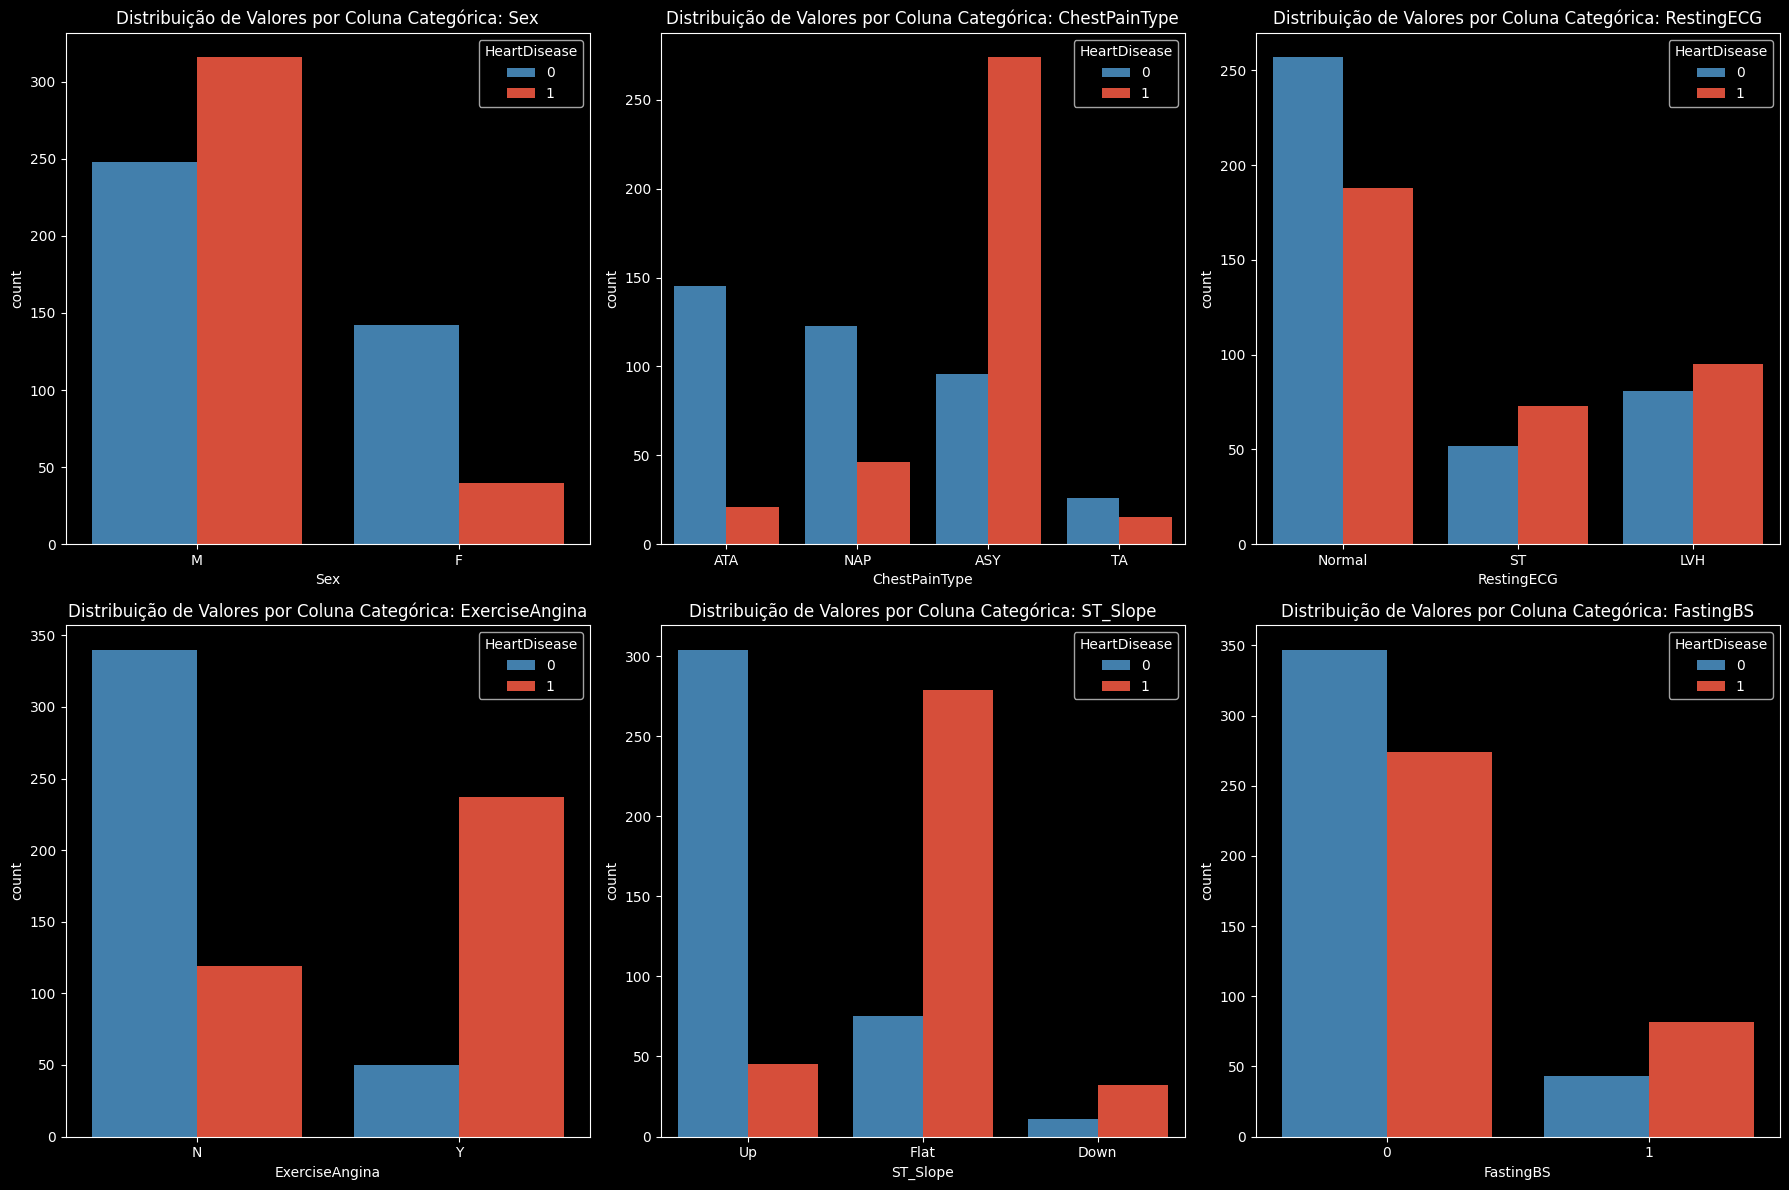

In [70]:
plt.figure(figsize=(18, 6 * 2))
for col in col_obj:
    plt.subplot(2, 3, col_obj.index(col) + 1)
    sns.countplot(x=col, data=df, hue='HeartDisease', palette=['#3182bd', '#f03b20'])
    plt.title(f"Distribuição de Valores por Coluna Categórica: {col}")
plt.tight_layout()
plt.show()

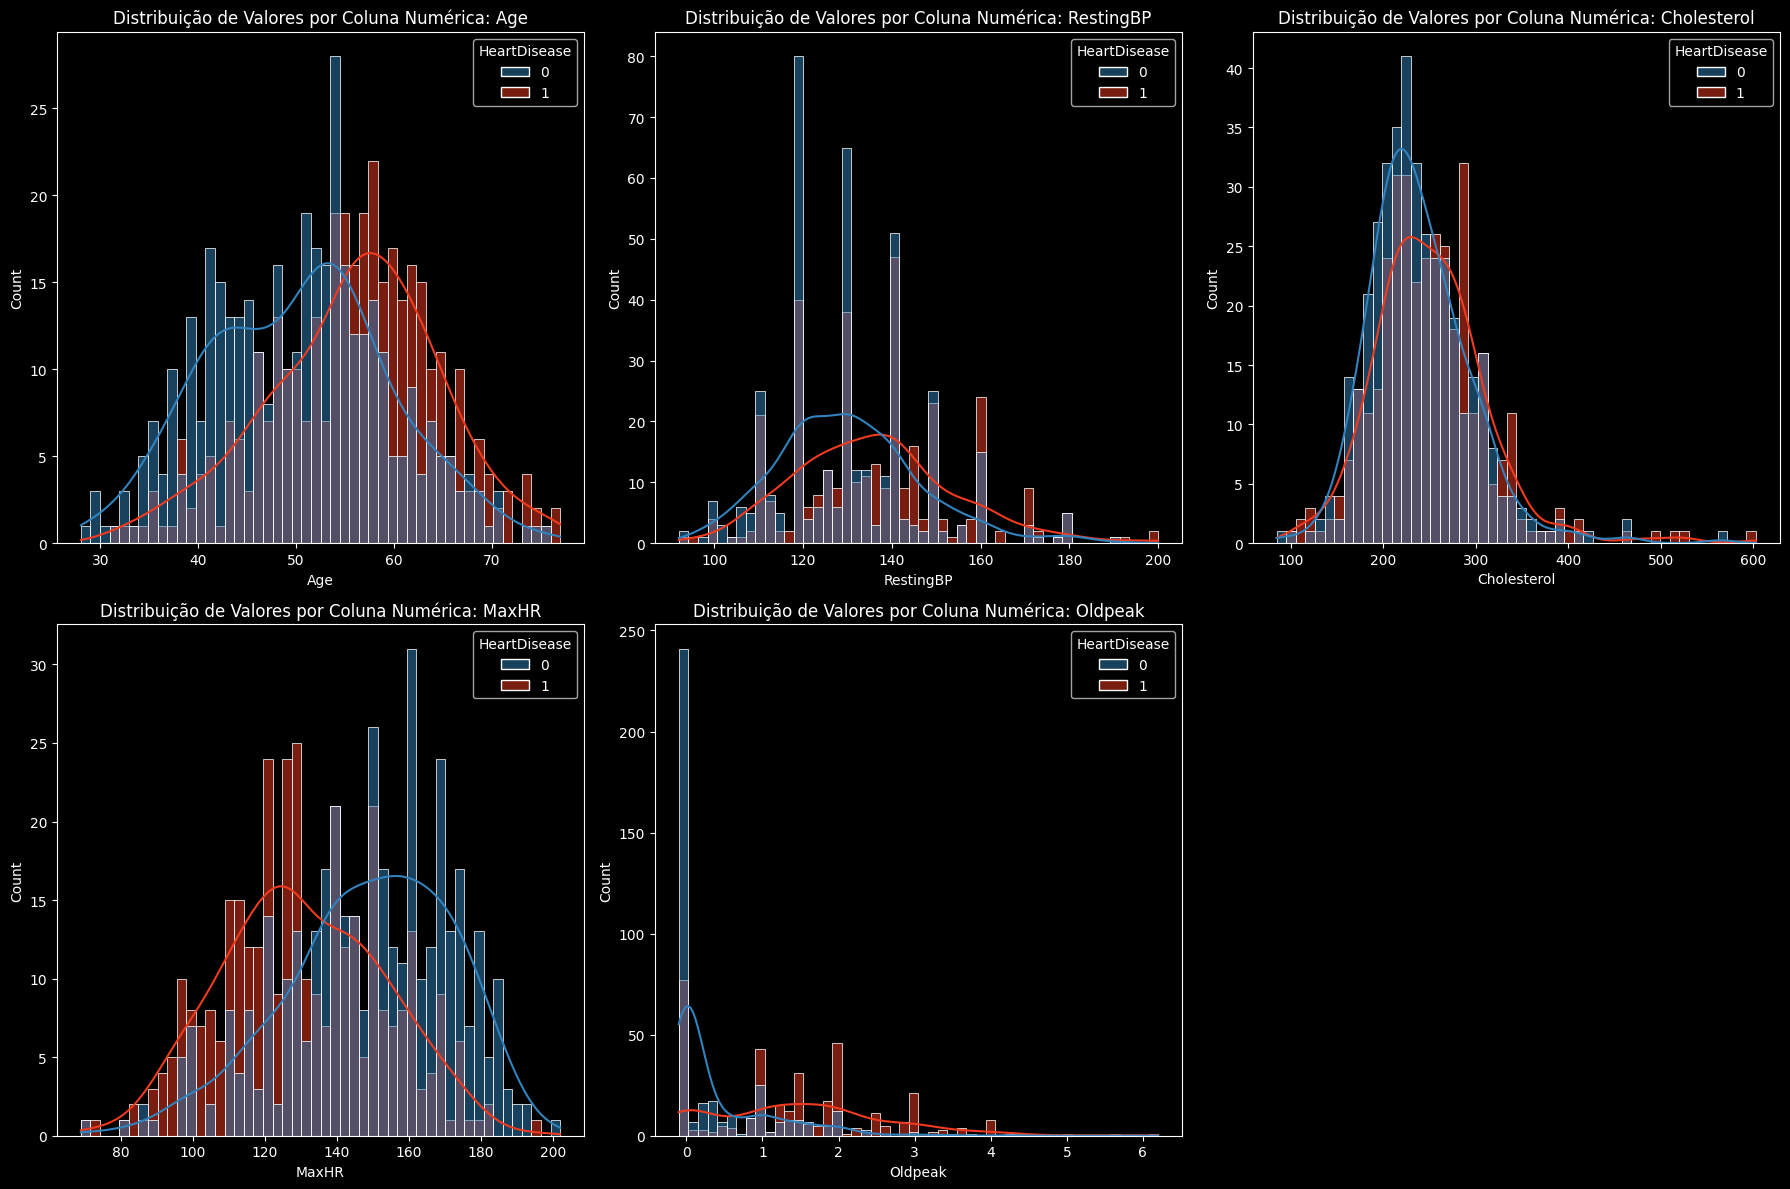

In [72]:
plt.figure(figsize=(18, 6 * 2))
for col in col_num:
    plt.subplot(2, 3, col_num.index(col) + 1)
    sns.histplot(x=col, data=df, hue='HeartDisease', palette=['#3182bd', '#f03b20'], kde=True, bins=50)
    plt.title(f"Distribuição de Valores por Coluna Numérica: {col}")
plt.tight_layout()
plt.show()

##### Análise Comparativa

In [76]:
num_combinations = [
    ('Age', 'RestingBP'),
    ('Age', 'Cholesterol'),
    ('Age', 'MaxHR'),
    ('Age', 'Oldpeak'),
    ('RestingBP', 'Cholesterol'),
    ('RestingBP', 'MaxHR'),
    ('RestingBP', 'Oldpeak'),
    ('Cholesterol', 'MaxHR'),
    ('Cholesterol', 'Oldpeak'),
    ('MaxHR', 'Oldpeak')
    ]

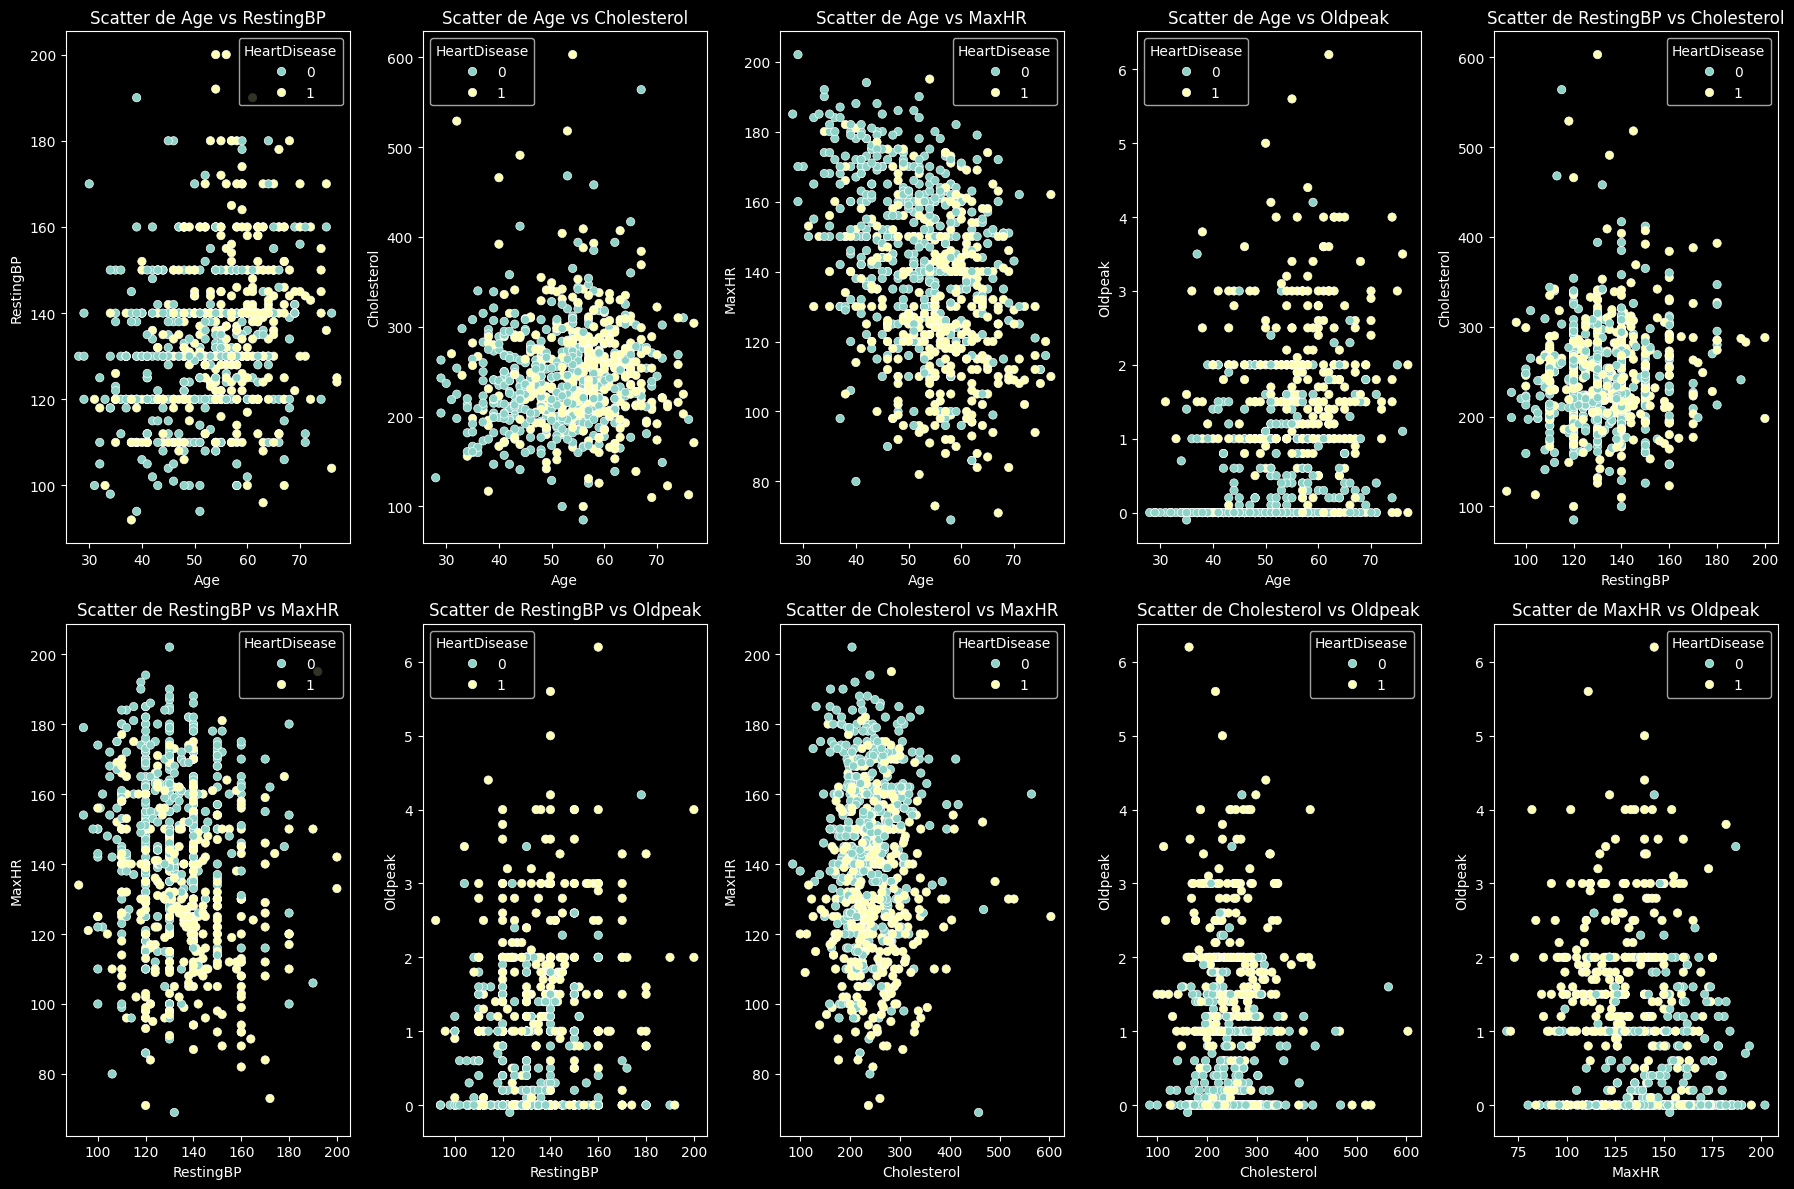

In [81]:
n_cols = 5
n_plots = len(num_combinations)
n_rows = (n_plots + n_cols - 1) // n_cols  

plt.figure(figsize=(18, 6 * n_rows))
for i, (col1, col2) in enumerate(num_combinations):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=df, x=col1, y=col2, hue='HeartDisease')
    plt.title(f'Scatter de {col1} vs {col2}')

plt.tight_layout()
plt.show()

In [91]:
col_num

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [113]:
def grafico_categorico_numerico(coluna):
    plt.figure(figsize=(18, 6 * 2))
    for col in col_obj:
        plt.subplot(2, 3, col_obj.index(col) + 1)
        sns.boxplot(x=col, y=coluna, data=df, hue='HeartDisease', palette='coolwarm')
        plt.title(f"{col} vs {coluna}")
    plt.tight_layout()
    plt.show()

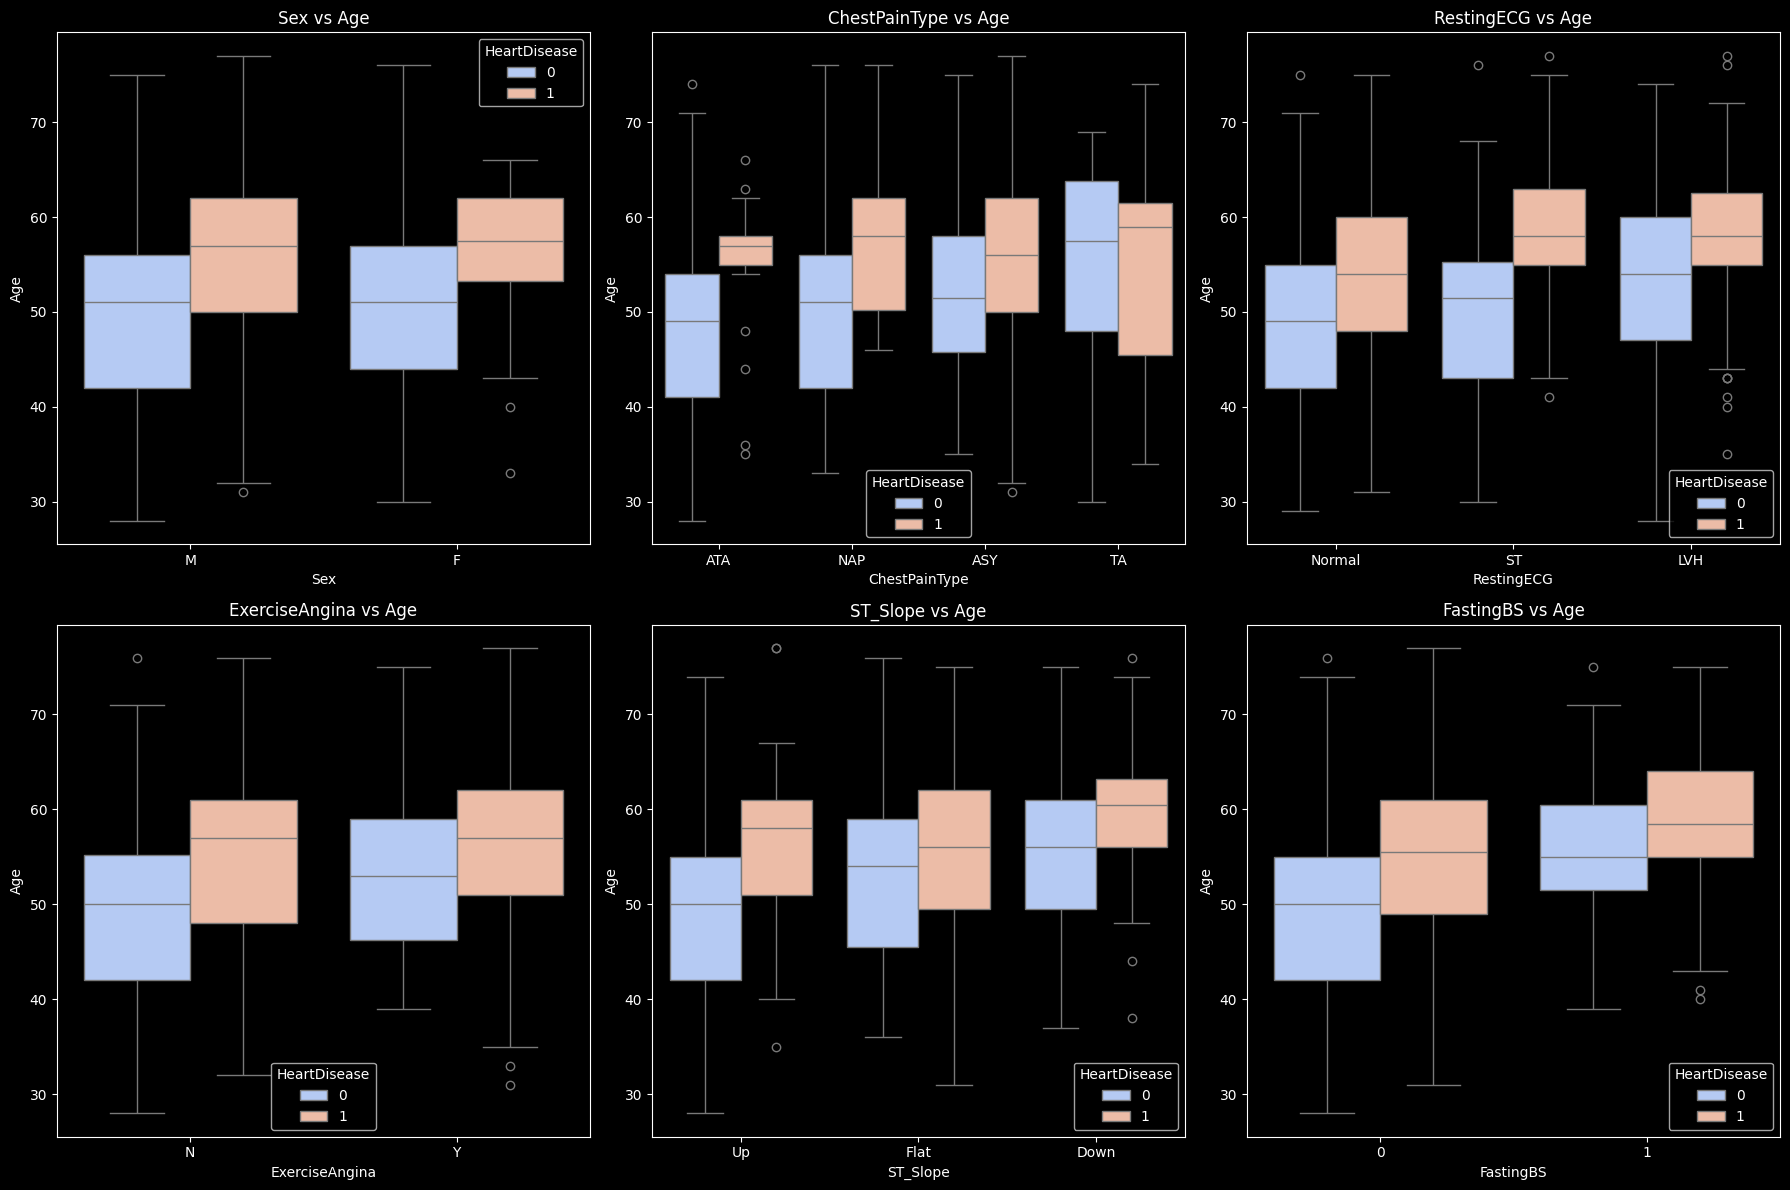

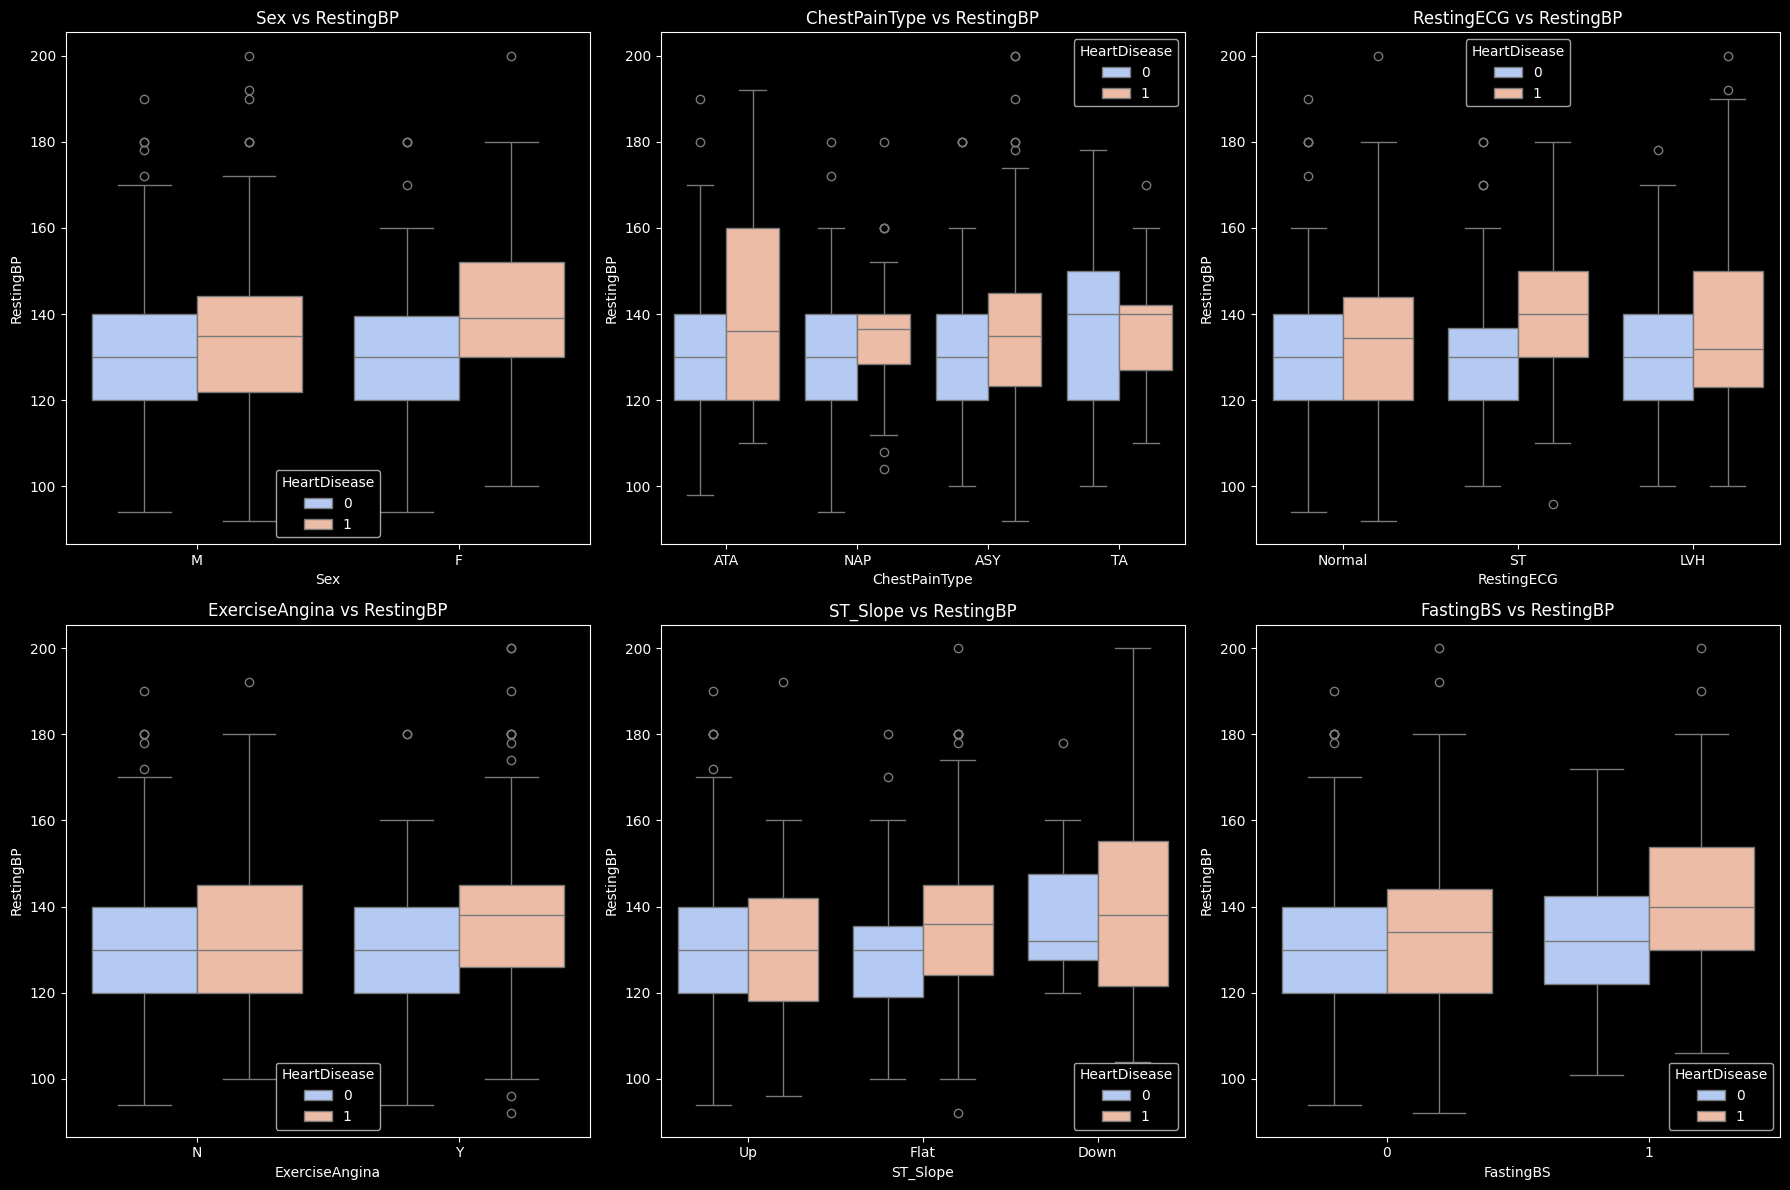

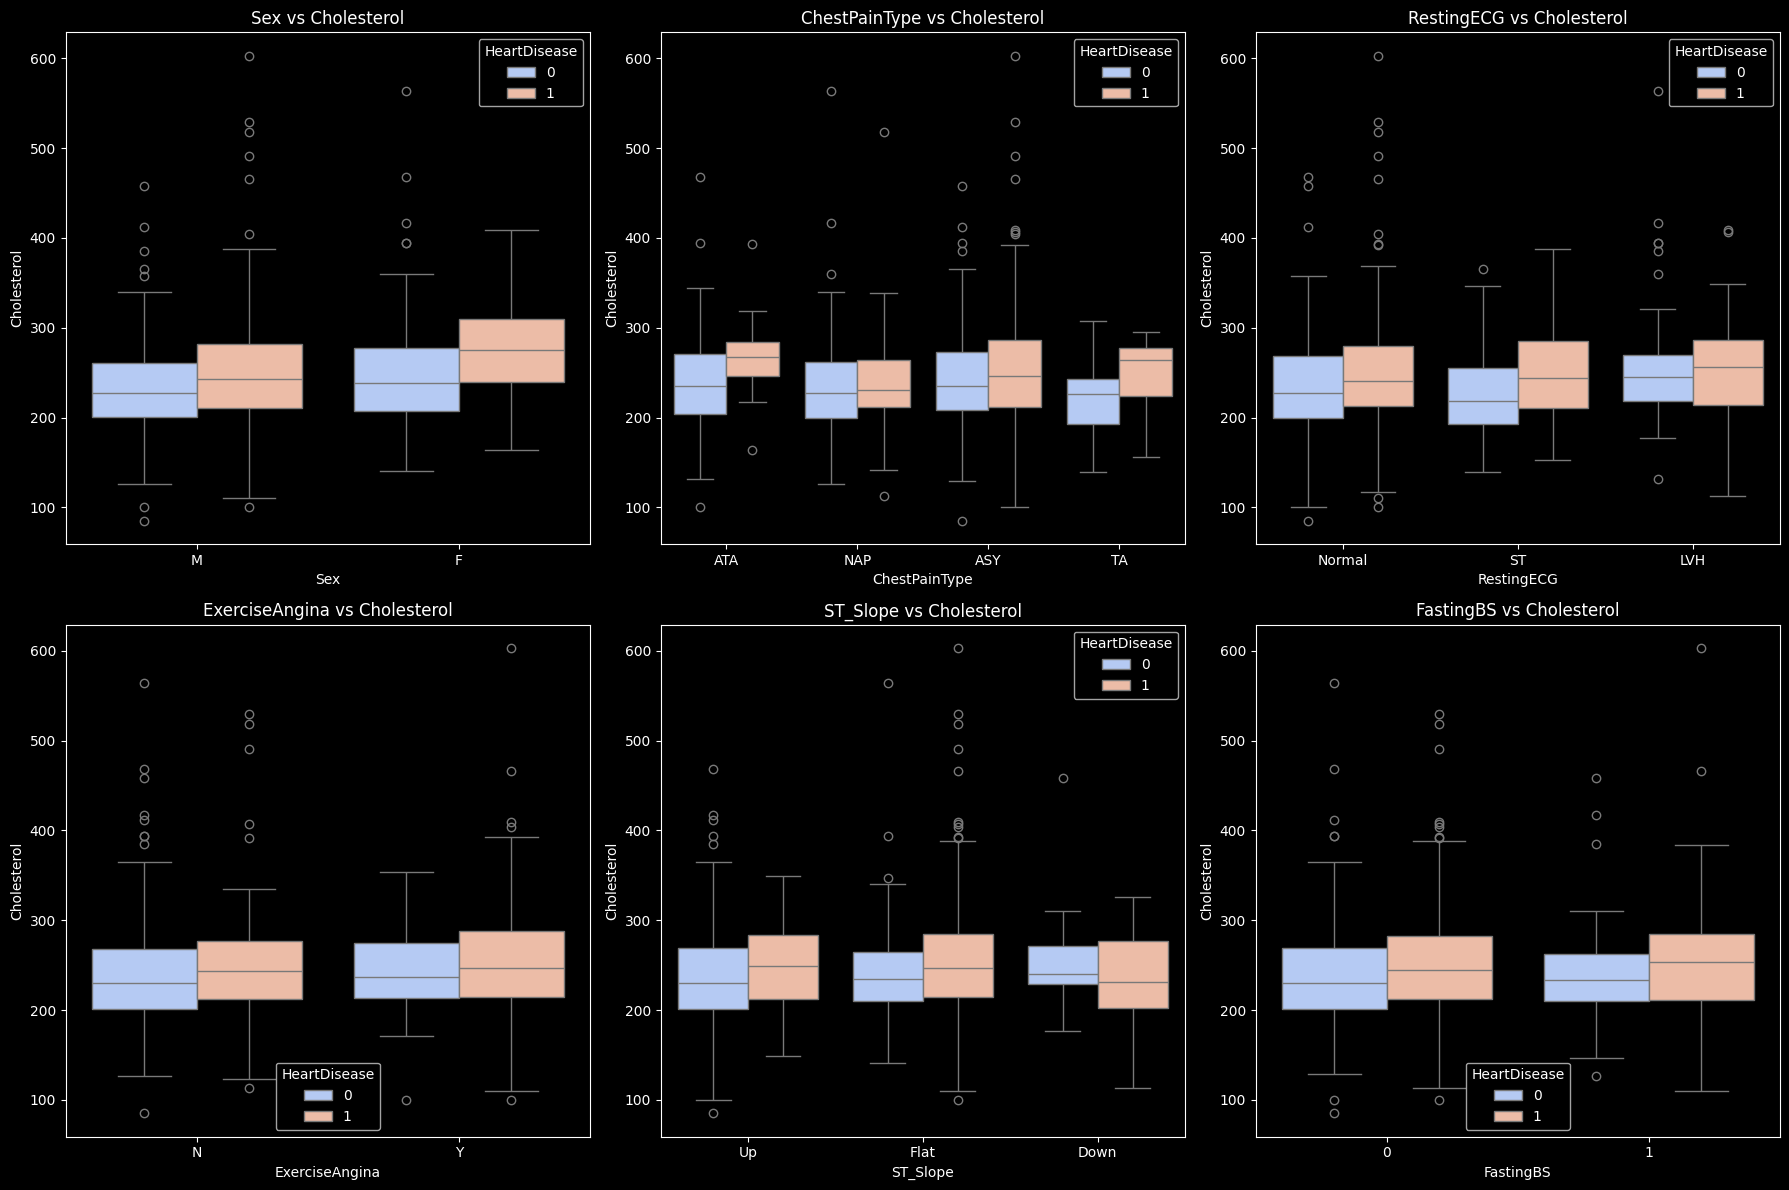

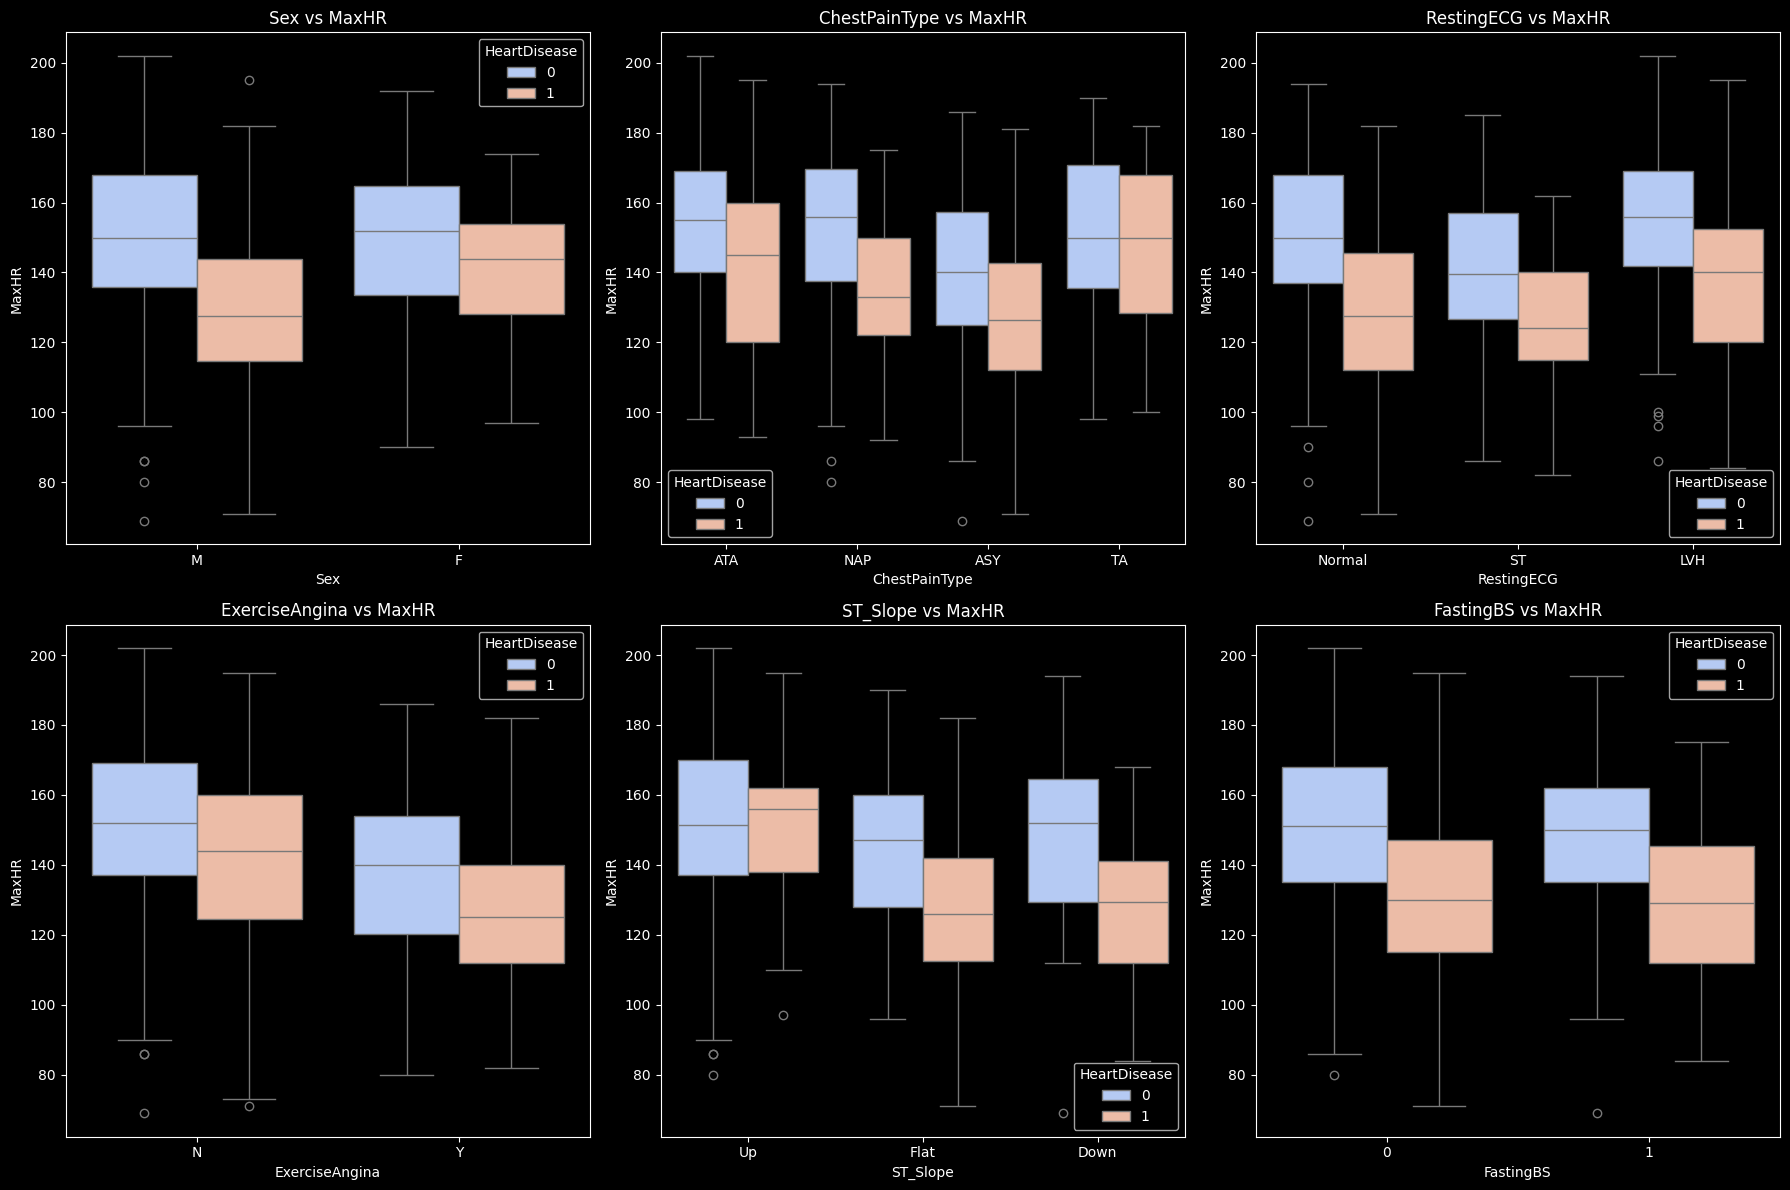

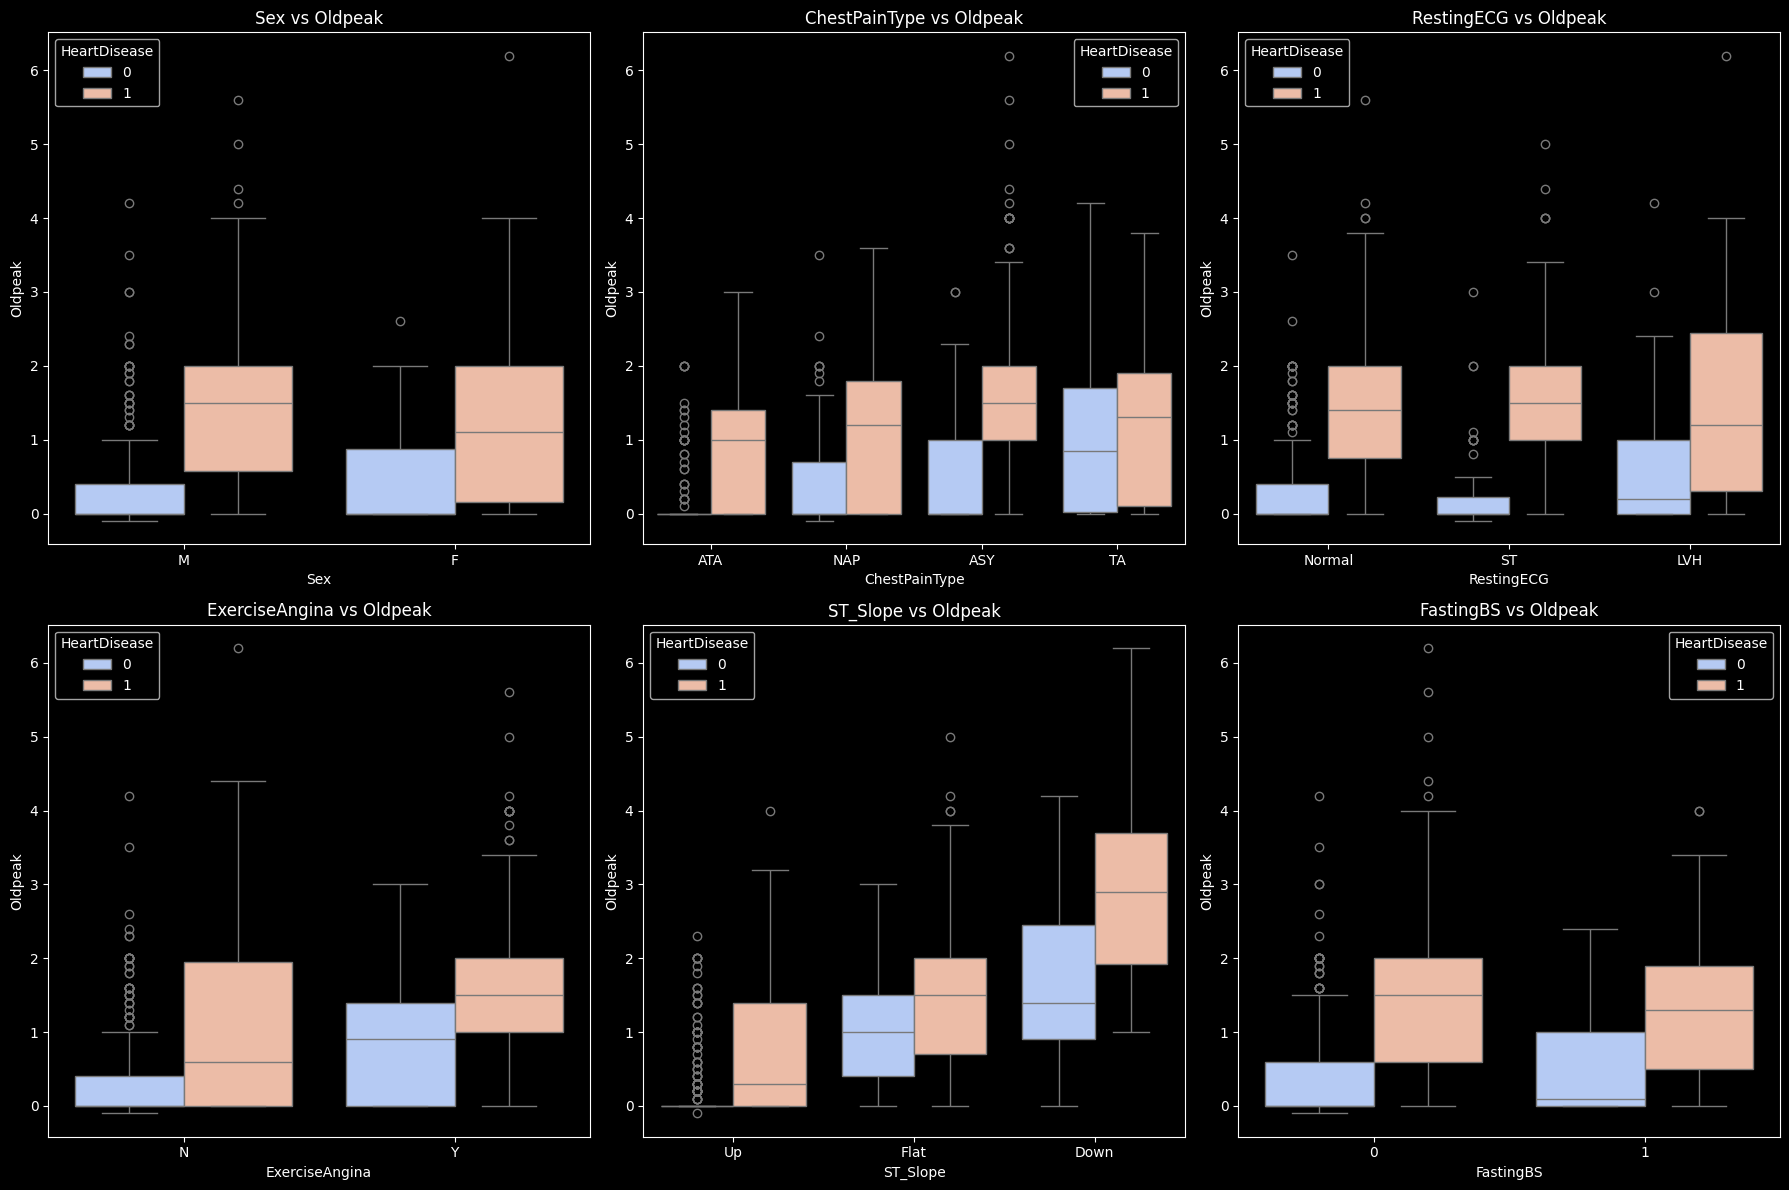

In [116]:
for col in col_num:
    grafico_categorico_numerico(col)